# Breast Cancer Survival Analysis from Harberman Dataset 

* Relative Information about Haberman Dataset

       The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.
       
 
* Attribute Information:

       -- Number of Instances: 306
       -- Number of Attributes: 4
       
    1 - Age of patient at time of operation 
    2 - Patient's year of operation (year - 1900, numerical)
    3 - Number of positive axillary nodes detected (numerical)
    4 - Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year


## Objective :

        -- The ultimate aim of this Analysis is to predict the survival status of the women, diagonosed with breast cancer.
        -- We are taking [Survival status] as the label for this analyis
        -- Three columns [Age, Year Of Operation, Positive Axillary Nodes] will be taken as a features to predict the Label [Survival Status]
        

In [95]:
#Importing Dependencies 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import Plotly as ply

#Reading a input dataset and assigning it with col names
data = pd.read_csv('E:/My AI/haberman.csv',names=['age','operation_year','axillary_node','survival_status_5y'])
print(data.columns)
feature = data.loc[ : ,['age','operation_year','axillary_node']]
print(feature.columns)

Index(['age', 'operation_year', 'axillary_node', 'survival_status_5y'], dtype='object')
Index(['age', 'operation_year', 'axillary_node'], dtype='object')


In [96]:
#Describing an input data with EDA functions to get insite about data
print(data.describe())

              age  operation_year  axillary_node  survival_status_5y
count  306.000000      306.000000     306.000000          306.000000
mean    52.457516       62.852941       4.026144            1.264706
std     10.803452        3.249405       7.189654            0.441899
min     30.000000       58.000000       0.000000            1.000000
25%     44.000000       60.000000       0.000000            1.000000
50%     52.000000       63.000000       1.000000            1.000000
75%     60.750000       65.750000       4.000000            2.000000
max     83.000000       69.000000      52.000000            2.000000


### 2D/Bi-Varient Plots

* Pair Plot
     -- Since we have 3 features columns to compare with label to predict   
     -- We go with Pair plot to understand best suitable pair for analysis

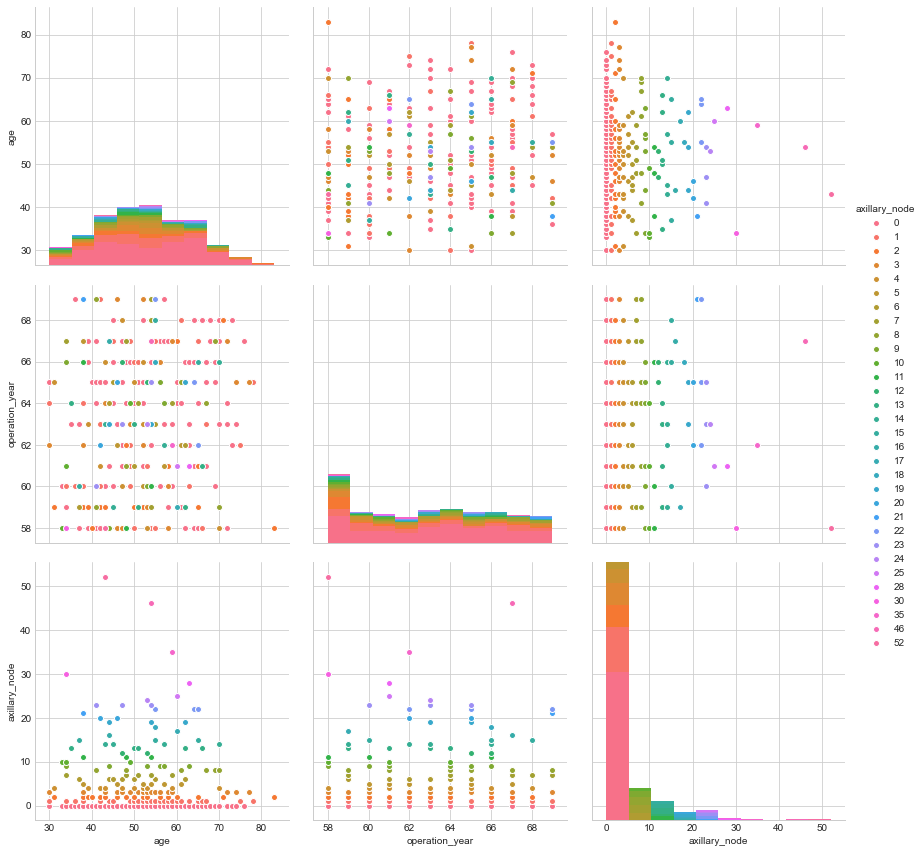

In [98]:
sns.set_style("whitegrid")
sns.pairplot(feature,hue='axillary_node',size=4)

* Observation :
        
        -- We observe that plot between the pair [Age of patient at time of operation , Number of positive axillary nodes detected] have relatively good plot to predict
        

* Scatter Plot:
        -- Based on the observation above we are trying to analyse the data between [Age of patient at time of operation , Number of positive axillary nodes detected] using Scatter plot

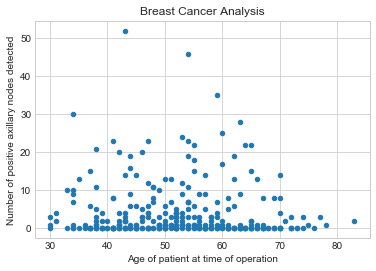

In [99]:
data.plot(kind='scatter',x='age',y='axillary_node')
plt.xlabel('Age of patient at time of operation')
plt.ylabel('Number of positive axillary nodes detected')
plt.title('Breast Cancer Analysis')
plt.show()



Observation :
* From the above analysis we found majaroity Number of positive axillary nodes detected  <25 with respect to age.
* We also observer across ages we have almost 40 % women's having no positive axillary nodes detected.

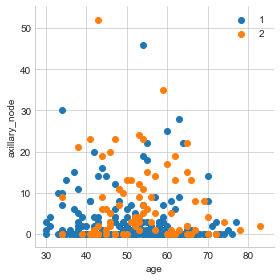

In [100]:
sns.set_style("whitegrid")
sns.FacetGrid(data,hue="survival_status_5y",size=4).map(plt.scatter,"age","axillary_node")
plt.legend()
plt.show()

observation:
* Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year.
* We observe here that patients with all age groups are prone to death.

# UniVarient

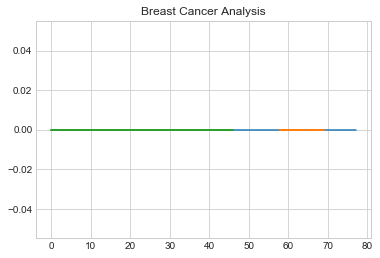

In [101]:
Alive=data.loc[data['survival_status_5y'] ==1];
Dead=data.loc[data['survival_status_5y']==2];
plt.plot(Alive['age'],np.zeros_like(Alive['age']))
plt.plot(Alive['operation_year'],np.zeros_like(Alive['operation_year']))
plt.plot(Alive['axillary_node'],np.zeros_like(Alive['axillary_node']))
plt.title('Breast Cancer Analysis')
plt.show()

Text(0.5,1,'Survival with repect to Age')

<Figure size 432x288 with 0 Axes>

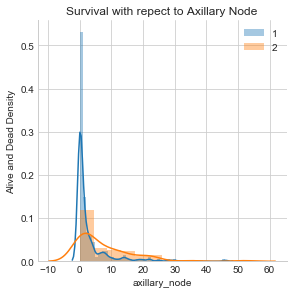

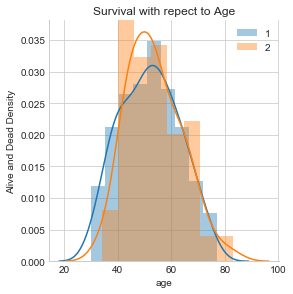

In [102]:
import warnings
warnings.filterwarnings("ignore") 
plt.figure(1)
sns.FacetGrid(data,hue="survival_status_5y",size=4).map(sns.distplot,"axillary_node")
plt.ylabel("Alive and Dead Density")
plt.legend()
plt.title("Survival with repect to Axillary Node")

plt.figure(2)
sns.FacetGrid(data,hue="survival_status_5y",size=4).map(sns.distplot,"age")
plt.ylabel("Alive and Dead Density")
plt.legend()
plt.title("Survival with repect to Age")

* Obseration:
    -- We Found auxillary Node > 5 more prone to death
    -- we Found patients having 0 axillary nodes have 2.5 times higher chance to be alive
    -- Age doesnt have much factor to decide on survival status. 

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


<function matplotlib.pyplot.show(*args, **kw)>

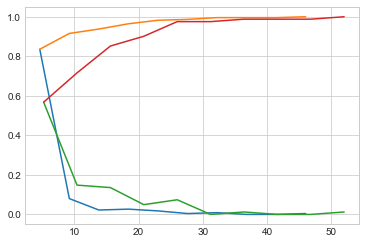

In [103]:
counts, bin_edges=np.histogram(Alive['axillary_node'],bins=10,density=True)
pdf=counts/sum(counts)
print(pdf)
print(bin_edges)
#CDF
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1: ],pdf)
plt.plot(bin_edges[1: ],cdf)
#Dead
counts, bin_edges=np.histogram(Dead['axillary_node'],bins=10,density=True)
pdf=counts/sum(counts)
print(pdf)
print(bin_edges)
#CDF
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1: ],pdf)
plt.plot(bin_edges[1: ],cdf)
plt.show

If axillary_node>45 more probablity of death is high
CDF intersecting point is 25

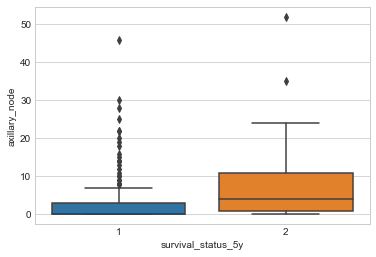

In [104]:
sns.boxplot(x='survival_status_5y',y='axillary_node',data=data)
plt.show()

Observation:
60% of error may happen
Paitents with axillary_node<5 has more surivival possibilities

# Conclusion:

        After Multiple analysis we come to conclusion that Survival possibilities are purely based on the Number of positive axillary nodes detected.
        Woman who she is aged and no Number of positive axillary nodes detected can survive.
        
         
     
